In [1]:
import random
from deap import base, creator, tools, algorithms

In [2]:
creator.create("FitnessAvg", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessAvg)

ind = creator.Individual([1, 0, 1, 1, 0])

print(ind)
print(ind.fitness)
print(type(ind))
print(type(ind.fitness))

[1, 0, 1, 1, 0]
()
<class 'deap.creator.Individual'>
<class 'deap.creator.FitnessAvg'>


In [3]:
toolbox = base.Toolbox()
toolbox.register("attr_bool", random.uniform, 0, 1)
toolbox.register("individual", tools.initRepeat, creator.Individual, toolbox.attr_bool, n=10)
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

bit = toolbox.attr_bool()
ind = toolbox.individual()
pop = toolbox.population(n=3)

print("bit is of type %s and has value\n%s" % (type(bit), bit))
print("ind is of type %s and contains %d bits\n%s" % (type(ind), len(ind), ind))
print("pop is of type %s and contains %d individuals\n%s" % (type(pop), len(pop), pop))

bit is of type <class 'float'> and has value
0.12859833192409553
ind is of type <class 'deap.creator.Individual'> and contains 10 bits
[0.9903251206866932, 0.5626730038266073, 0.706200988713575, 0.7895133848457137, 0.6972734882122698, 0.8909743582672668, 0.3681253098015418, 0.03447547277287355, 0.35617493567212033, 0.3217642286187583]
pop is of type <class 'list'> and contains 3 individuals
[[0.5707616106284937, 0.11989551297202006, 0.1486278942480339, 0.4772500484004617, 0.36140885639510145, 0.023438332993381605, 0.6692156406725137, 0.10047691342718246, 0.016646866670173455, 0.4779019436025025], [0.5204925916972295, 0.025789336395299012, 0.49758880609680367, 0.2888329382155357, 0.5478033247811157, 0.9844816933357495, 0.3817946038225979, 0.6473031497885638, 0.21395945549527318, 0.6051679105275097], [0.6366004414746548, 0.9594476498994314, 0.8767873073371342, 0.44527511516338425, 0.1995568237898797, 0.7505883388609319, 0.68095977857939, 0.28801987958026265, 0.466123301012784, 0.23212909

In [4]:
def evalOneMax(individual):
    return float(sum(individual)) / max(len(individual), 1),

toolbox.register("evaluate", evalOneMax)
toolbox.register("mate", tools.cxOnePoint)
toolbox.register("mutate", tools.mutGaussian, mu=0.0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selTournament, tournsize=3)

ind = toolbox.individual()
print(ind)
toolbox.mutate(ind)
print(ind)

[0.6943797360047212, 0.5421610473107051, 0.7292987172930249, 0.8518590343904489, 0.06257260575367618, 0.68762676160219, 0.1570500730620621, 0.415222162167735, 0.6830898785989452, 0.6807491440082484]
[0.9000406461716605, 0.5421610473107051, 0.7292987172930249, 0.9874099738683587, 0.06257260575367618, 0.68762676160219, 0.1570500730620621, 0.415222162167735, 0.6830898785989452, 0.6807491440082484]


In [5]:
mutant = toolbox.clone(ind)
print(mutant is ind)
print(mutant == ind)

False
True


gen	nevals	avg     	min     	max     
0  	100   	0.499313	0.250086	0.709122
1  	71    	0.422134	0.354161	0.506147
2  	64    	0.393969	0.366607	0.480896
3  	70    	0.358242	0.277479	0.410628
4  	68    	0.315136	0.226193	0.385338
5  	70    	0.282795	0.208308	0.349786
6  	71    	0.253066	0.197128	0.291241
7  	64    	0.218654	0.174635	0.274522
8  	63    	0.191024	0.144927	0.208308
9  	72    	0.169272	0.137142	0.208308
10 	72    	0.150867	0.0950942	0.188541
11 	74    	0.132092	0.0922723	0.182021
12 	74    	0.10845 	0.0601819	0.144927
13 	66    	0.0931435	0.0601819	0.144927
14 	72    	0.079164 	0.0180887	0.0950942
15 	77    	0.0560978	0.0180887	0.0882757
16 	76    	0.0301553	-0.00549557	0.0664177
17 	71    	0.0122317	-0.010917  	0.0414284
18 	71    	-0.00187718	-0.034707  	0.0158708
19 	69    	-0.0211245 	-0.0437251 	0.0109475
20 	70    	-0.0439877 	-0.0874031 	-0.00500307
21 	69    	-0.0542706 	-0.100322  	-0.00500307
22 	63    	-0.0675096 	-0.118953  	-0.0399953 
23 	73    	-0.0969729 	-0.

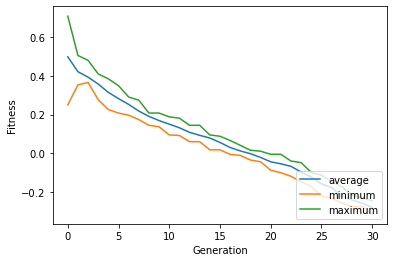

In [6]:
def main():
    import numpy
    
    pop = toolbox.population(n=100)
    hof = tools.HallOfFame(1)
    stats = tools.Statistics(lambda ind: ind.fitness.values)
    stats.register("avg", numpy.mean)
    stats.register("min", numpy.min)
    stats.register("max", numpy.max)
    
    MU = 20
    LAMBDA = 100 
    
    pop, logbook = algorithms.eaMuPlusLambda(pop, toolbox, mu=MU, lambda_=LAMBDA, cxpb=0.5, mutpb=0.2, ngen=30, stats=stats, halloffame=hof, verbose=True)
    
    return pop, logbook, hof

if __name__ == "__main__":
    pop, log, hof = main()
    print("Best individual is: %s\nwith fitness: %s" % (hof[0], hof[0].fitness))
    
    import matplotlib.pyplot as plt
    gen, avg, min_, max_ = log.select("gen", "avg", "min", "max")
    plt.plot(gen, avg, label="average")
    plt.plot(gen, min_, label="minimum")
    plt.plot(gen, max_, label="maximum")
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.legend(loc="lower right")
    plt.show()